# **Exploratory Data Analysis** ✅

### 1. **Understanding Curve**
Curve Finance, the foremost Automated Market Maker (AMM) in DeFi, operates as a decentralized exchange (DEX). Its primary objective is to provide users with high liquidity, low slippage, and cost-effective transactions among ERC-20 tokens.

- [Curve Overview](https://resources.curve.fi/): Hundreds of liquidity pools launched through Curve's factory, incentivized by Curve's DAO.

- [Protocol Insights](https://resources.curve.fi/crv-token/understanding-crv/): The CRV token, central to the Curve ecosystem, serves purposes like incentivizing liquidity providers and engaging users in protocol governance.

### 2. **AMM Logic and Crypto Pools**
The whitepaper delves into the design and implementation of crypto pools on Curve Finance, revealing the constant mean invariant (CMI) algorithm. 

- [AMM Logic Whitepaper](https://classic.curve.fi/files/crypto-pools-paper.pdf): CMI, a generalization of constant product invariant, preserves the weighted geometric mean of reserves, offering advantages like lower slippage, higher capital efficiency, and reduced risk of impermanent loss.

### 3. **Role of Automation in Supporting Global Finance on Blockchain**
Automation plays a crucial role in enhancing the efficiency, security, and transparency of transactions and processes in Curve Finance.

- Automation facilitates cross-chain swaps, synthetic asset creation, and yield farming.

- The Curve DAO, governed by smart contracts on the Ethereum network, benefits from streamlined automation.


# **Preprocessing** ✅

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("husl")
sns.set_style("darkgrid")

### **DAI_USDT_USDC**

In [4]:
dtc1 = pd.read_csv('DATA/DAI-USDC-USDT.csv',parse_dates=['DATE'])
dtc1['DATE'] = pd.to_datetime(dtc1['DATE']).dt.date

dtc2 = pd.read_csv('DATA/DAI-USDC-USDT2.csv',parse_dates=['DATE'])
dtc2['DATE'] = pd.to_datetime(dtc2['DATE']).dt.date

In [5]:
DUU = pd.merge(dtc1,dtc2,on='DATE')

### **TVL**

In [6]:
TVL = pd.read_csv("DATA/curve-dex.csv", usecols=["Date", "Curve DEX.6"], low_memory=False)
TVL["Date"] = pd.to_datetime(TVL["Date"], dayfirst=True)
TVL = TVL.rename(columns={"Curve DEX.6": "ETH TVL(USD)"})

In [7]:
TVL.dropna(subset=["Date"], inplace=True)
TVL.fillna(method="bfill", inplace=True)

In [8]:
first_date = TVL["Date"].min()
last_date = TVL["Date"].max()

expected_dates = pd.date_range(start=first_date, end=last_date, freq="D")

missing_dates = expected_dates[~expected_dates.isin(TVL["Date"])]

if len(missing_dates) == 0:
    print("No missing dates.")
else:
    print("Missing dates:")
    print(missing_dates)

No missing dates.


In [9]:
TVL["ETH TVL(USD)"] = TVL["ETH TVL(USD)"].astype("Float64").round(3)

### **Trading Volume**

In [10]:
TV = pd.read_parquet("DATA/CURVE_TV_2020-08-01_to_2023-08-10.parquet")

In [11]:
TV["Date"] = pd.to_datetime(TV["Date"])

In [12]:
TV.loc[TV['Date']=='2023-06-14']['Trading Volume'].item()

206562418.47

In [13]:
TV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1106 non-null   datetime64[ns]
 1   Trading Volume  1106 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.4 KB


In [14]:
first_date = TV["Date"].min()
last_date = TV["Date"].max()

expected_dates = pd.date_range(start=first_date, end=last_date, freq="D")

missing_dates = expected_dates[~expected_dates.isin(TV["Date"])]

if len(missing_dates) == 0:
    print("No missing dates.")
else:
    print("Missing dates:")
    print(missing_dates)

No missing dates.


# **Historical Evolution** ✅
TASK: Examine the historical evolution of trading volume on Curve Finance and identify the three most significant shifts in trading volume, whether they increased or decreased. Additionally, ascertain the real-world events that precipitated these volume changes.

### **Stablecoin Depegging Event: March 10–13, 2023**

### Background
- The failure of three US banks — **Silicon Valley Bank (SVB)**, **Signature Bank**, and **Silvergate Bank** — triggered significant market turbulence.
- This event had direct implications for stablecoins, particularly **USD Coin (USDC)** and **DAI**.

### USDC Depegging:
- **USDC** depegged by **13% below $1** after its issuer, **Circle**, confirmed that **$3.3 billion** of cash reserves backing USDC were held at SVB.
- Circle also relied partly on **Signature Bank** and **Silvergate Bank** for USDC-to-fiat US dollar redemptions.

### DAI's Connection:
- **DAI** closely tracked USDC's value because, at the time, USDC holdings and related instruments represented over **half of the collateral reserves** backing DAI.

### Recovery and Reserve Adjustments:
- Both stablecoins eventually recovered to their peg levels after the **Federal Reserve** confirmed support for the banks' creditors.
- Subsequently, both stablecoins adjusted their reserve compositions:
    - **USDC** shifted its cash reserves primarily to **Bank of New York Mellon**, which also serves as the primary custodian for USDC's reserve assets.
    - **DAI** diversified its reserves away from USDC, allocating significantly to **multiple stablecoins** and increasing real-world asset shares.

### Implications:
- The event highlighted the delicate balance between stability and market dynamics in the world of stablecoins.
- Decentralized alternatives gained prominence as investors sought resilience during the crisis.

In [15]:
incident_period_data_svb = TV[(TV['Date'] >= '2023-01-01') & (TV['Date'] <= '2023-3-30')]
before_incident_data = incident_period_data_svb[(incident_period_data_svb['Date'] >= '2023-1-01')&(incident_period_data_svb['Date'] <= '2023-03-09')]
during_incident_data = incident_period_data_svb[(incident_period_data_svb['Date'] >= '2023-3-10')&(incident_period_data_svb['Date'] <= '2023-03-13')]

In [16]:
average_volume_during_incident = during_incident_data['Trading Volume'].mean()
average_volume_before_incident = before_incident_data['Trading Volume'].mean()
percentage_increase = ((average_volume_during_incident - average_volume_before_incident) / average_volume_before_incident) * 100

In [17]:
print(f"Average trading volume during the incident: {average_volume_during_incident:.2f}")
print(f"Average trading volume for other days: {average_volume_before_incident:.2f}")
print(f"Percentage increase: {percentage_increase:.2f}%")

Average trading volume during the incident: 3106889733.96
Average trading volume for other days: 222074023.70
Percentage increase: 1299.03%


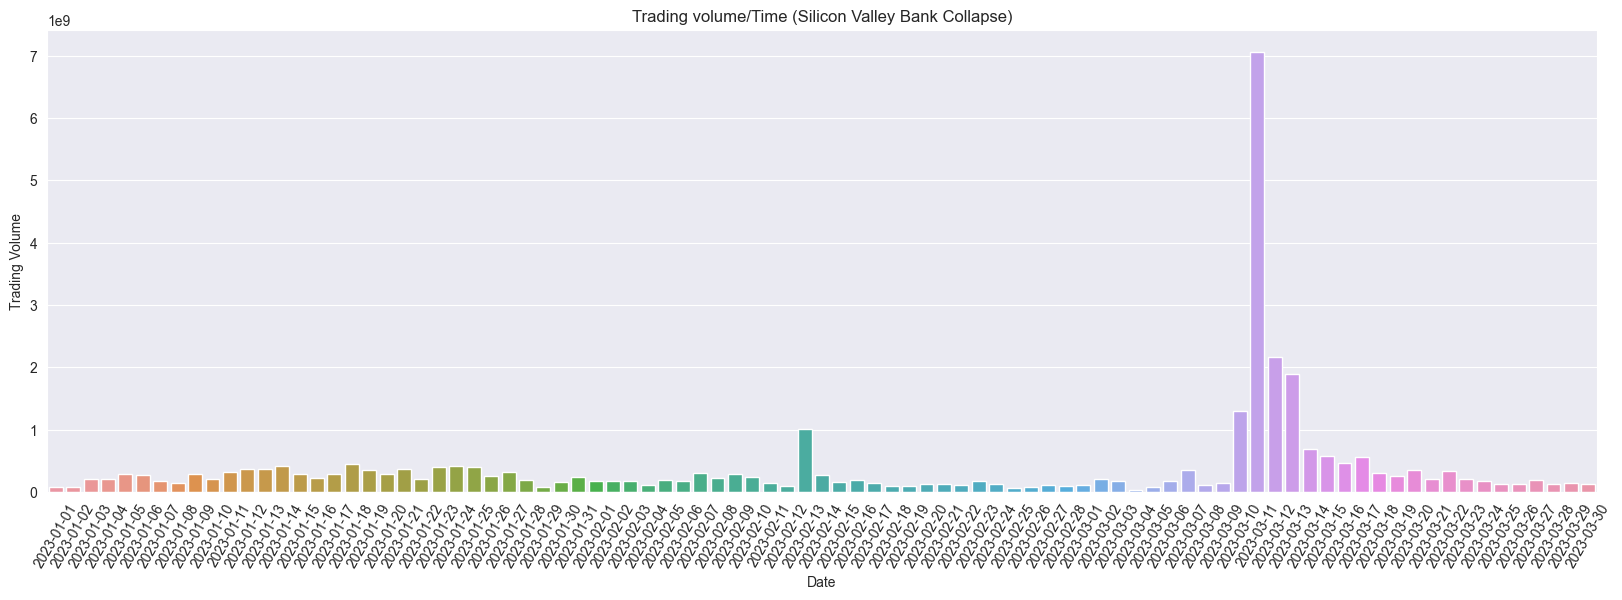

In [18]:
start_date = "2023-01-01"
end_date = "2023-03-30"
filtered_TV = incident_period_data_svb.loc[(incident_period_data_svb["Date"] >= start_date) & (incident_period_data_svb["Date"] <= end_date)].copy()
filtered_TV["Date"] = filtered_TV["Date"].dt.strftime("%Y-%m-%d")
plt.figure(figsize=(20, 6))
plt.title("Trading volume/Time (Silicon Valley Bank Collapse)")
sns.barplot(x="Date", y="Trading Volume", data=filtered_TV)
plt.xticks(rotation=60)
plt.show()

In [19]:
print(f"On this day Curve recorded it's highest ever trading volume reaching up to 7 Billion ({incident_period_data_svb.loc[incident_period_data_svb['Date']=='2023-03-11']['Trading Volume'].item()})")

On this day Curve recorded it's highest ever trading volume reaching up to 7 Billion (7061869193.14)


### **Impact on Curve Finance: UST Depegging Incident**

 Background
- **Terra's UST**, a stablecoin pegged to the US dollar, experienced a sudden depegging event.
- The incident involved massive selling of UST on both **Curve Finance** and **Binance**.
- Time period of incident  May 7th 2023 - May 11th 2023 for impact (measurement)

### Key Points

1. **Trading Volume Surge**:
   - The UST depegging triggered a surge in trading volume on **Curve Finance**.
   - Traders sought liquidity and alternatives during the crisis.

2. **Liquidity Disruptions**:
   - The sudden outflow of UST from the **Anchor Protocol** impacted liquidity and stability.
   - Curve Finance, as a decentralized liquidity pool, played a critical role during this period.

In [20]:
incident_period_data_ust = TV[(TV['Date'] >= '2022-03-20') & (TV['Date'] <= '2022-5-20')]
before_incident_data = incident_period_data_ust[(incident_period_data_ust['Date'] >= '2022-03-20')&(incident_period_data_ust['Date'] <= '2022-5-7')]
during_incident_data = incident_period_data_ust[(incident_period_data_ust['Date'] >= '2022-5-7')&(incident_period_data_ust['Date'] <= '2022-5-13')]

In [21]:
average_volume_during_incident = during_incident_data['Trading Volume'].mean()
average_volume_before_incident = before_incident_data['Trading Volume'].mean()
percentage_increase = ((average_volume_during_incident - average_volume_before_incident) / average_volume_before_incident) * 100

In [22]:
print(f"Average trading volume during the incident: {average_volume_during_incident:.2f}")
print(f"Average trading volume for other days: {average_volume_before_incident:.2f}")
print(f"Percentage increase: {percentage_increase:.2f}%")

Average trading volume during the incident: 2687446830.61
Average trading volume for other days: 369584476.83
Percentage increase: 627.15%


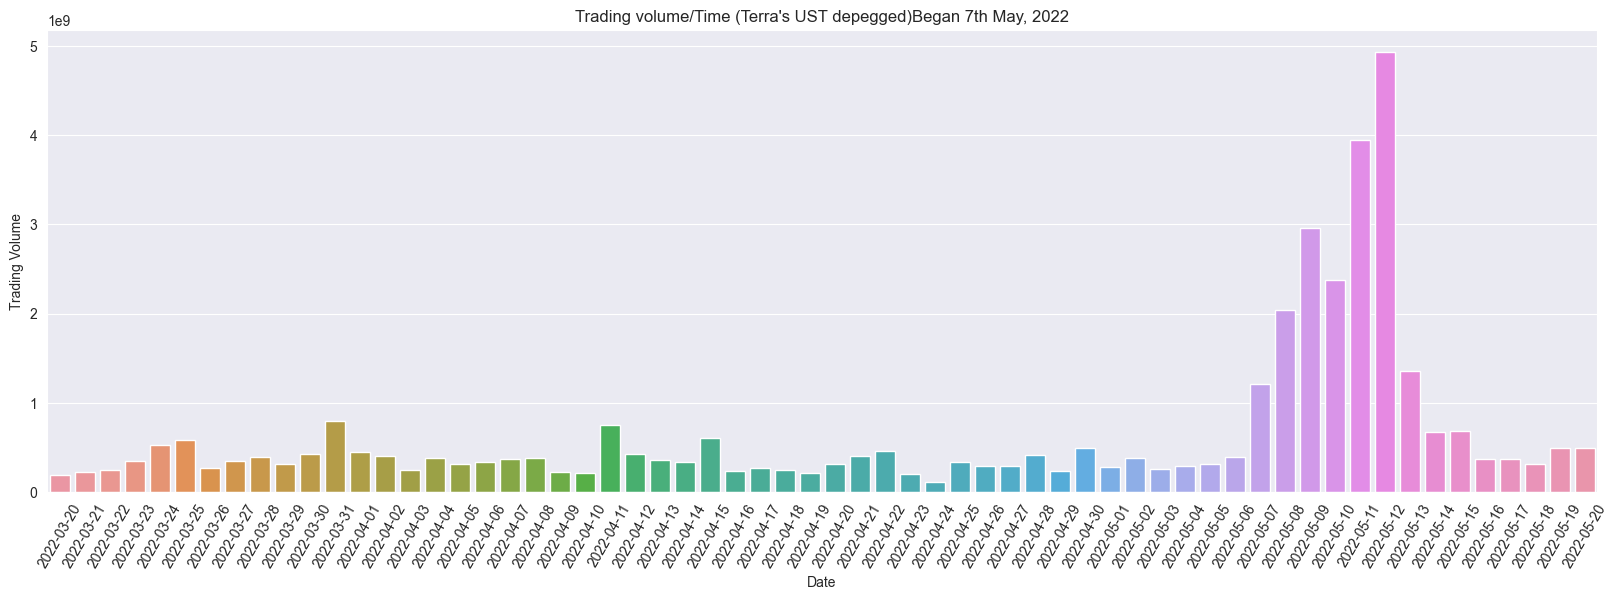

In [23]:
start_date = "2022-03-20"
end_date = "2022-6-20"
filtered_TV = incident_period_data_ust.loc[(incident_period_data_ust["Date"] >= start_date) & (incident_period_data_ust["Date"] <= end_date)].copy()
filtered_TV["Date"] = filtered_TV["Date"].dt.strftime("%Y-%m-%d")
plt.figure(figsize=(20, 6))
plt.title("Trading volume/Time (Terra's UST depegged)Began 7th May, 2022")
sns.barplot(x="Date", y="Trading Volume", data=filtered_TV)
plt.xticks(rotation=60)
plt.show()

In [24]:
print(f'With the peak trading volume at the time being around 4.9 billion ({incident_period_data_ust.loc[incident_period_data_ust["Date"]=="2022-5-12"]["Trading Volume"].item()})')

With the peak trading volume at the time being around 4.9 billion (4930032913.77)


### **FTX Collapse**
The collapse of FTX, a major cryptocurrency exchange, sent shockwaves through the crypto market. This event could have led to increased trading volumes on platforms like Curve Finance for several reasons:

1. **Increased Volatility**: The uncertainty and panic following the FTX collapse likely increased market volatility. Traders often seek to capitalize on these price fluctuations, leading to higher trading volumes.

2. **Shift to DeFi**: The collapse highlighted the risks associated with centralized exchanges (CeFi), potentially causing a shift towards decentralized finance (DeFi) platforms like Curve Finance.

3. **Loss of Confidence**: The event could have shaken investor confidence, prompting them to move their assets, which would also contribute to increased trading volumes.

While it's clear that such a significant event would have ripple effects throughout the crypto market, it's important to note that correlation does not imply causation. Other factors could also have contributed to the increase in trading volume observed on Curve Finance. As always, careful analysis and staying updated with the latest market news is crucial in the dynamic world of cryptocurrencies.

In [25]:
incident_period_data_ftx = TV[(TV['Date'] >= '2022-11-01') & (TV['Date'] <= '2022-11-20')]
before_incident_data = incident_period_data_ftx[(incident_period_data_ftx['Date'] >= '2022-10-1')&(incident_period_data_ftx['Date'] <= '2022-11-6')]
during_incident_data = incident_period_data_ftx[(incident_period_data_ftx['Date'] >= '2022-11-6')&(incident_period_data_ftx['Date'] <= '2022-11-13')]

In [26]:
average_volume_during_incident = during_incident_data['Trading Volume'].mean()
average_volume_before_incident = before_incident_data['Trading Volume'].mean()
percentage_increase = ((average_volume_during_incident - average_volume_before_incident) / average_volume_before_incident) * 100

In [27]:
print(f"Average trading volume during the incident: {average_volume_during_incident:.2f}")
print(f"Average trading volume for other days: {average_volume_before_incident:.2f}")
print(f"Percentage increase: {percentage_increase:.2f}%")

Average trading volume during the incident: 937627070.30
Average trading volume for other days: 135252936.60
Percentage increase: 593.24%


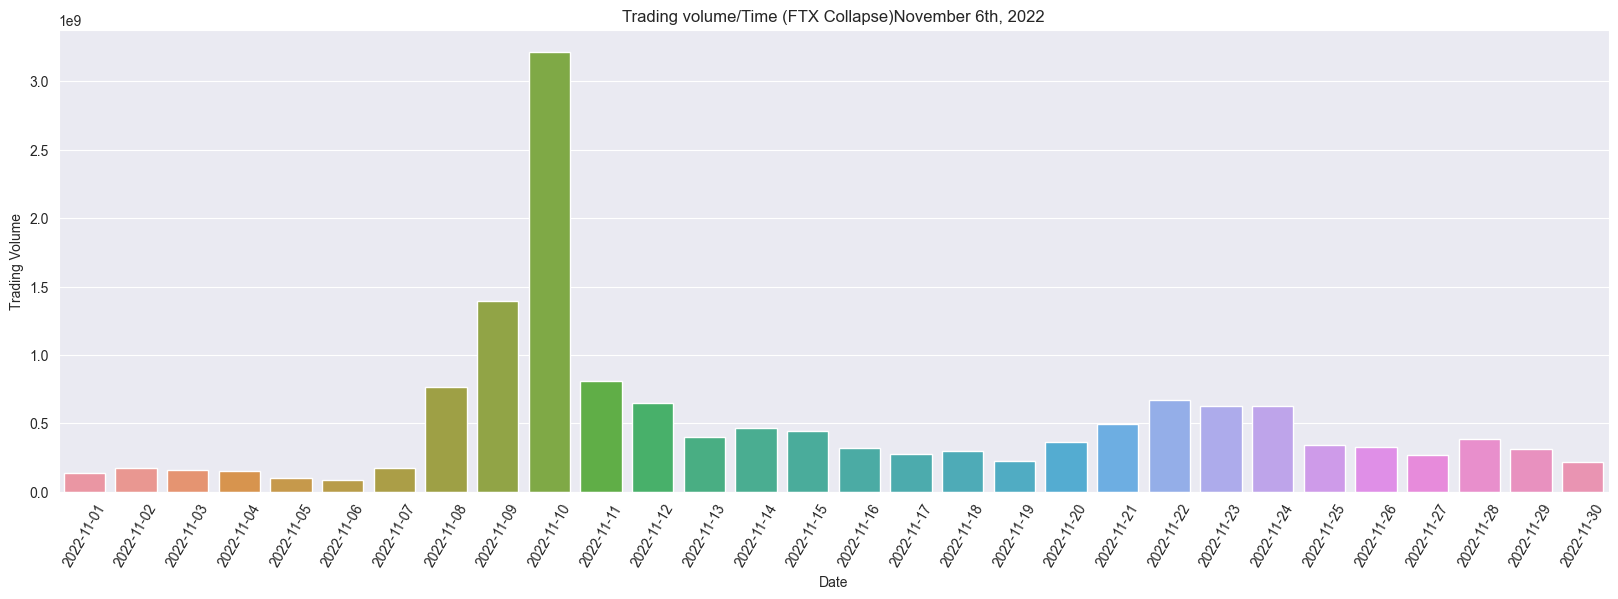

In [28]:
start_date = "2022-11-1"
end_date = "2022-11-30"
filtered_TV = TV[(TV["Date"] >= start_date) & (TV["Date"] <= end_date)]
filtered_TV = TV.loc[(TV["Date"] >= start_date) & (TV["Date"] <= end_date)].copy()
filtered_TV["Date"] = filtered_TV["Date"].dt.strftime("%Y-%m-%d")
plt.figure(figsize=(20, 6))
plt.title("Trading volume/Time (FTX Collapse)November 6th, 2022")
sns.barplot(x="Date", y="Trading Volume", data=filtered_TV)
plt.xticks(rotation=60)
plt.show()

In [29]:
print(f'With the peak trading volume at the time being around 3.2 billion ({incident_period_data_ftx.loc[incident_period_data_ftx["Date"]=="2022-11-10"]["Trading Volume"].item()})')

With the peak trading volume at the time being around 3.2 billion (3213836878.94)


# **Trading Volume Fluctuations** ✅
TASK: Study how trading volume fluctuates throughout the day and week. Identify the days and times when trading volume peaks and is most popular.


### Trading Volume by Day of Week:

- **Peak Days:**
  - Thursday has the highest average trading volume.
  - Weekdays (Monday to Friday) generally have higher volumes than the weekend.

### Trading Volume by Week of Month:

- **Peak Weeks:**
  - The second week of the month has the highest average trading volume.
  - Trading volumes are relatively lower in the first and fifth weeks.

### Trading Volume by Month:

- **Peak Months:**
  - January and May exhibit the highest average trading volumes.
  - July and August have notably lower average trading volumes.

### Trading Volume by Quarter:

- **Quarterly Trends:**
  - The first and second quarters show higher average trading volumes.
  - There is a noticeable drop in trading volume in the third quarter.

### Overall Insights:

- **Day and Time Peaks:**
  - Thursdays and mid-week generally see increased trading activity.
  - The second week of the month is notably active.

- **Seasonal Trends:**
  - January and May show heightened trading volumes, while July and August are quieter.

In [30]:
TVF = TV.copy()

In [31]:
# Removing the effect of the SVB Collapse and the FTX collapse and UST depug
outlier_date = "2023-03-11"
TVF['DayOfWeek'] = TVF['Date'].dt.day_name()
average_march_volume = TVF[TVF["Date"].dt.month == 3]["Trading Volume"].mean()
TVF.loc[TVF["Date"] == outlier_date, "Trading Volume"] = average_march_volume

outlier_date = "2022-11-10"
average_march_volume = TVF[TVF["Date"].dt.month == 11]["Trading Volume"].mean()
TVF.loc[TV["Date"] == outlier_date, "Trading Volume"] = average_march_volume

outlier_date = "2022-5-11"
average_march_volume = TVF[TVF["Date"].dt.month == 5]["Trading Volume"].mean()
TVF.loc[TVF["Date"] == outlier_date, "Trading Volume"] = average_march_volume

outlier_date = "2022-5-10"
average_march_volume = TVF[TVF["Date"].dt.month == 5]["Trading Volume"].mean()
TVF.loc[TVF["Date"] == outlier_date, "Trading Volume"] = average_march_volume

TVF['WeekOfMonth'] = TVF['Date'].dt.day.apply(lambda day: (day - 1) // 7 + 1)

- **Average Trading Volume by Day of Week**

In [32]:
daily_average = TVF.groupby("DayOfWeek")["Trading Volume"].mean().reset_index()

In [33]:
# Assuming your DataFrame is named df
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_average['DayOfWeek'] = pd.Categorical(daily_average['DayOfWeek'], categories=days_order, ordered=True)
daily_average = daily_average.sort_values(by='DayOfWeek')


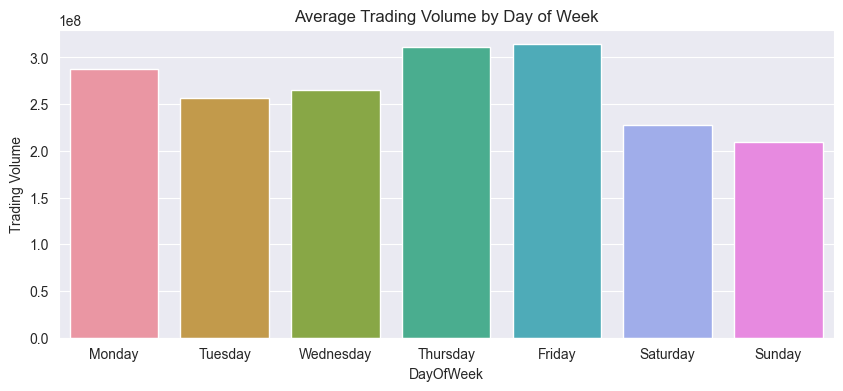

In [34]:
plt.figure(figsize=(10, 4))
sns.barplot(
    x="DayOfWeek",
    y="Trading Volume",
    data=daily_average
)
plt.title("Average Trading Volume by Day of Week")
plt.show()

- Week-wise Analysis

In [35]:
weekly_average = TVF.groupby("WeekOfMonth")["Trading Volume"].mean().reset_index()

In [36]:
week_mapping = {1: 'First', 2: 'Second', 3: 'Third', 4: 'Fourth', 5: 'Fifth'}

weekly_average['WeekOfMonth'] = weekly_average['WeekOfMonth'].map(week_mapping)


In [37]:
weekly_average

,WeekOfMonth,Trading Volume
0,First,2.258232e+08
1,Second,3.115625e+08
2,Third,2.740342e+08
3,Fourth,2.687189e+08
4,Fifth,2.394194e+08


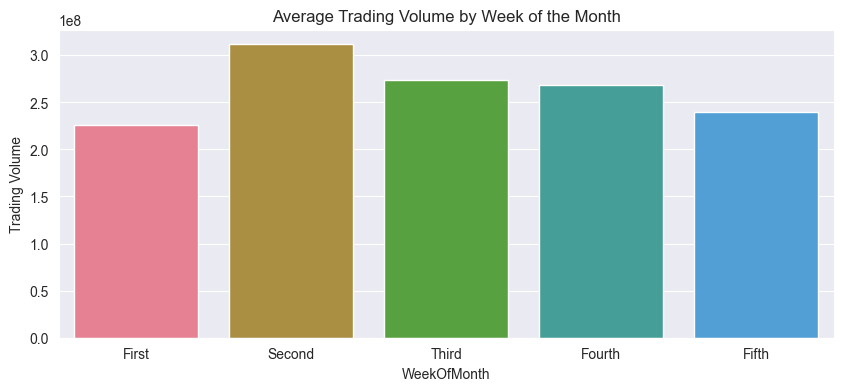

In [38]:
plt.figure(figsize=(10, 4))
sns.barplot(
    x="WeekOfMonth",
    y="Trading Volume",
    data=weekly_average
)
plt.title("Average Trading Volume by Week of the Month")
plt.show()

- **Month-wise Analysis**

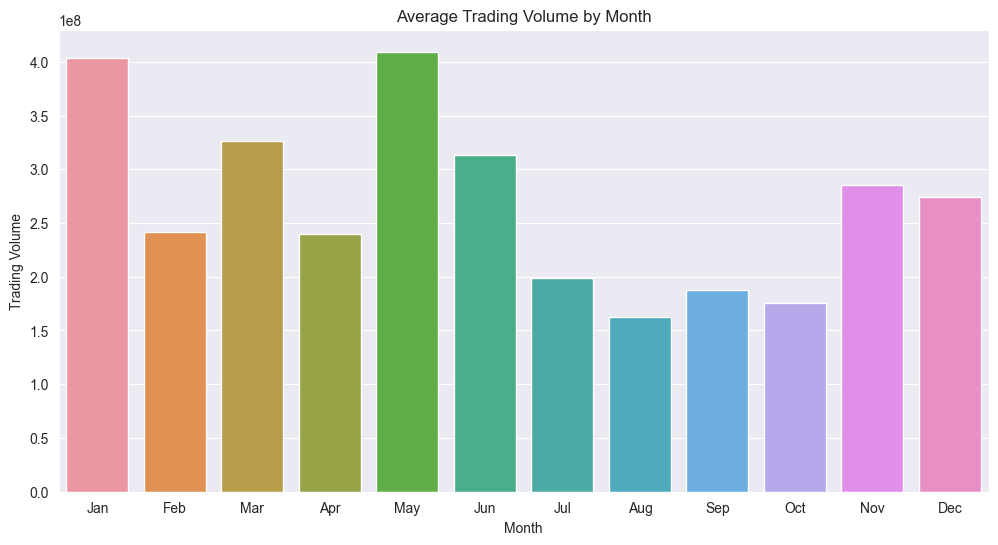

In [39]:
plt.figure(figsize=(12, 6))
TVF["Month"] = TVF["Date"].dt.month
import calendar


monthly_average = TVF.groupby("Month")["Trading Volume"].mean().reset_index()
monthly_average["Month"] = monthly_average["Month"].apply(lambda x: calendar.month_abbr[x])
sns.barplot(x="Month", y="Trading Volume", data=monthly_average)
plt.title("Average Trading Volume by Month")
plt.show()

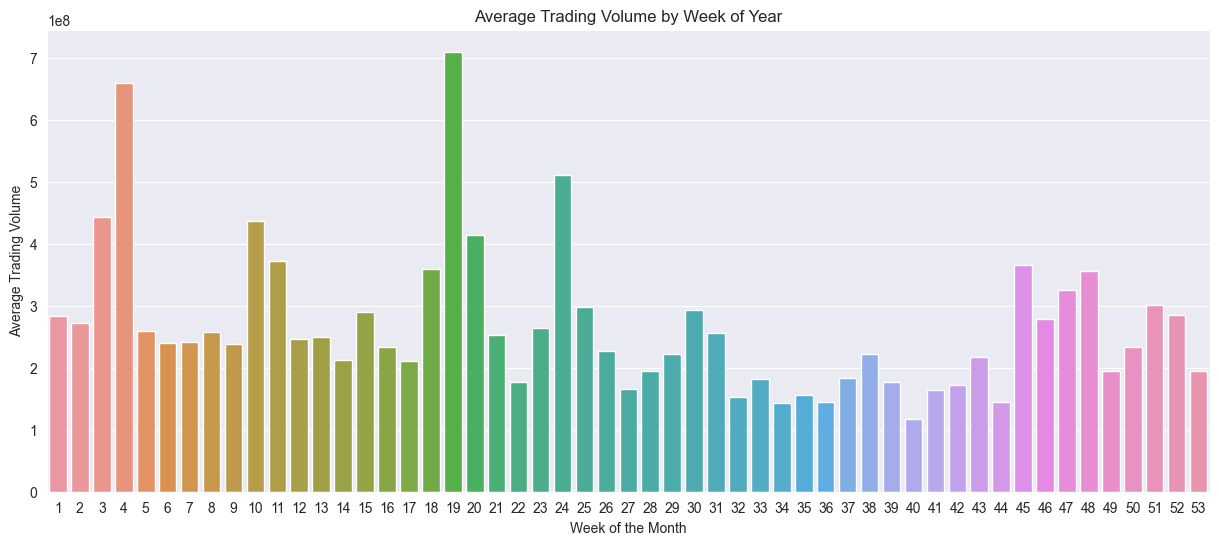

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

TVF["WeekOfYear"] = TVF["Date"].dt.isocalendar().week
weekly_average = (
    TVF.groupby(["WeekOfYear", "Month"])["Trading Volume"].mean().reset_index()
)

plt.figure(figsize=(15, 6))

sns.barplot(
    x="WeekOfYear", y="Trading Volume", data=weekly_average, errorbar=None)
plt.title("Average Trading Volume by Week of Year")
plt.xlabel("Week of the Month")
plt.ylabel("Average Trading Volume")

plt.show()

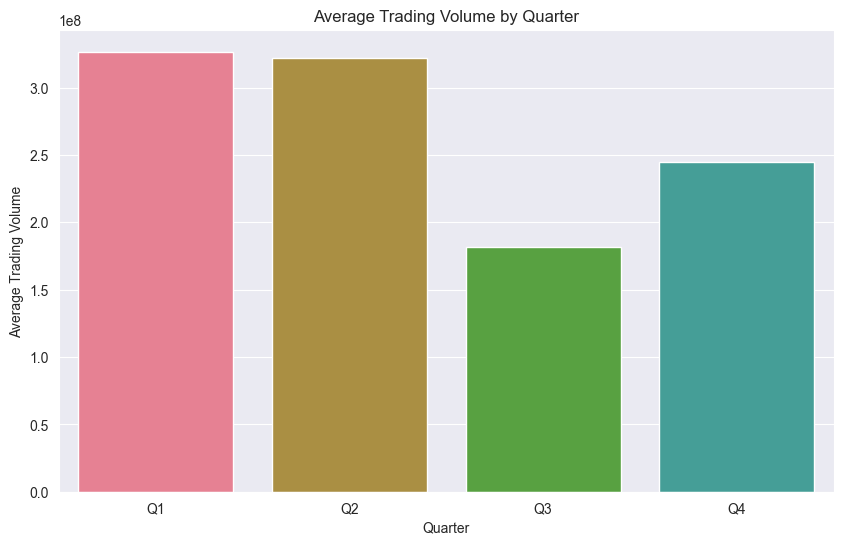

In [41]:
TVF['Quarter'] = TVF['Date'].dt.quarter

quarterly_average = TVF.groupby('Quarter')['Trading Volume'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(
    x="Quarter",
    y="Trading Volume",
    data=quarterly_average,
)
plt.title("Average Trading Volume by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Average Trading Volume")

plt.xticks(ticks=[0, 1, 2, 3], labels=['Q1', 'Q2', 'Q3', 'Q4'])

plt.show()

# **veCRV Impact** ✅
Task : *Measure the influence of the veCRV launch on October 10, 2020, which occurred a few months after the initial launch of Curve Finance in August 2020. Analyze both the immediate and broader effects on the protocol and liquidity dynamics.*

The launch of veCRV on October 10, 2020 was a significant event for Curve Finance and its users. veCRV is the vote-escrowed version of CRV, the native token of Curve, which allows users to participate in the governance of the protocol and receive various benefits¹. Here are some of the impacts of the veCRV launch:

- **Increased governance participation**: Users who lock their CRV tokens into veCRV can vote on proposals that affect the protocol, such as adding new pools, adjusting fees, distributing rewards, and more². This gives users more power and influence over the development and direction of Curve, as well as aligning their incentives with the long-term success of the protocol³.

- **Higher yields for liquidity providers**: Users who hold veCRV can also boost their rewards from providing liquidity to Curve pools². The boost factor depends on the amount and duration of veCRV locked, and can increase the yield by up to 2.5 times. This creates a positive feedback loop, as more users are incentivized to lock CRV and provide liquidity, which in turn increases the trading volume and fees generated by the protocol.

- **More demand and value for CRV**: The launch of veCRV also created more demand and scarcity for CRV, as users need to acquire and lock CRV to access the benefits of veCRV. This can have a positive effect on the price and market capitalization of CRV, as well as reducing the selling pressure from inflation. Moreover, veCRV holders can also receive a portion of the fees collected by the protocol, which adds another source of income and value for CRV.

In summary, the launch of veCRV was a major milestone for Curve Finance, as it introduced a novel mechanism to reward and empower its users, as well as enhancing the utility and value of its native token. veCRV has also contributed to the growth and innovation of the DeFi ecosystem, as Curve is one of the leading platforms for stablecoin and pegged-asset swaps across multiple blockchains.

- [DeFi Platform Curve Finance Takes First Steps Toward crvUSD- CoinDesk](https://www.coindesk.com/tech/2022/09/07/defi-platform-curve-finance-takes-first-steps-toward-crvusd-stablecoin/.)
- [How Yield Farming on Curve Is Quietly Conquering DeFi - CoinDesk](https://www.coindesk.com/markets/2021/11/03/a-look-into-curves-ecosystem-defis-centerpiece/.)
- [Curve DAO: Vote-Escrowed CRV — Curve 1.0.0 documentation - Read the Docs.](https://curve.readthedocs.io/dao-vecrv.html.)

In [42]:
VCI = pd.merge(TV,TVL, how = 'left')\
    .loc[TV['Date'] <='2021-01-01']

In [58]:
veCRV_holders = pd.read_csv('DATA/veCRV%20holders.csv')

In [63]:
veCRV_holders['Balance'] = veCRV_holders['Balance'].replace(',', '', regex=True).astype(float)

In [64]:
total_veCRV = veCRV_holders['Balance'].sum()

# Calculate the average, median, and standard deviation of the veCRV holdings per wallet
average_veCRV = veCRV_holders['Balance'].mean()
median_veCRV = veCRV_holders['Balance'].median()
std_veCRV = veCRV_holders['Balance'].std()

# Print the results
print(f'Total veCRV in circulation: {total_veCRV:.2f}')
print(f'Average veCRV per wallet: {average_veCRV:.2f}')
print(f'Median veCRV per wallet: {median_veCRV:.2f}')
print(f'Standard deviation of veCRV per wallet: {std_veCRV:.2f}')


Total veCRV in circulation: 640011648.80
Average veCRV per wallet: 71033.48
Median veCRV per wallet: 126.19
Standard deviation of veCRV per wallet: 3480208.14


# **Trading Volume vs Liquidity** ✅
TASK
*Examine the connection between trading volume and liquidity in Curve Finance by:*
- Investigating the factors that impact trading volume.
- Assessing how liquidity influences trading volume. 


*The TVL in a DEX is calculated by summing up the values of all assets in the liquidity pools. Each liquidity pool contains a pair of assets, and users provide liquidity by depositing an equivalent value of both assets into the pool. The TVL is often used as an indicator of the liquidity and attractiveness of a DEX.*

## **Investigating the factors that impact trading volume.** 🍀

- *News and events: When there is important news or events that affect the market sentiment or the fundamentals of an asset, it can trigger more trading activity, as traders react to the new information or expectations. This can increase the trading volume of the asset. In situations like hacks or something like the SVB collapseor even the usd depug the trading volume seems to sky rocket*. A good example would be the SVB Collapse 

- *Liquidity: When an asset has high liquidity, it means that it can be easily bought or sold without affecting its price. High liquidity can encourage more trading activity, as traders can execute their orders quickly and cheaply. This can increase the trading volume of the asset.*

- *Price movements: When the price of an asset changes significantly, it can attract more buyers and sellers who want to profit from the volatility or hedge their risks. This can increase the trading volume of the asset.*

### **News and Events**✅

*The code calculates the daily swaps and trading volume for a pool. The SVB collapse shows how news can affect trading volume by changing market behavior and sentiment. News can increase or decrease trading volume depending on the situation.*

### **Liquidity**✅

An intriguing observation emerges from the charts, revealing an inverse relationship between trading volume and liquidity. As trading volume increases, there is a concurrent decrease in liquidity. One plausible explanation for this phenomenon could be a substantial transfer of funds during periods of heightened trading activity. This movement may lead to a depletion of the liquidity pool, contributing to the observed decrease in liquidity.

In [45]:
DEX = pd.merge(TV,TVL, how = 'left')
da_ut_tc = DUU.copy()

In [46]:
da_ut_tc

,APY,APY_BASE,APY_REWARD,TVL,DATE,SWAP_COUNT,TOTAL_TRADING_VOLUME_USD
0,0.88000,NaN,NaN,4167240293,2022-02-11,58,33178365.49
1,0.84000,NaN,NaN,4186769773,2022-02-12,38,12935173.89
2,0.82000,NaN,NaN,4162616595,2022-02-13,26,4410228.82
3,0.87000,NaN,NaN,4145994144,2022-02-14,46,46450007.47
4,1.02000,NaN,NaN,4095248903,2022-02-15,48,15940885.52
...,...,...,...,...,...,...,...
634,1.37371,0.41,0.96371,196483782,2023-11-08,140,41408659.45
635,1.31699,0.41,0.90699,196631712,2023-11-09,161,42056112.69
636,1.42680,0.43,0.99680,195761359,2023-11-10,155,43556793.13
637,1.24309,0.20,1.04309,193388756,2023-11-11,119,18315863.63


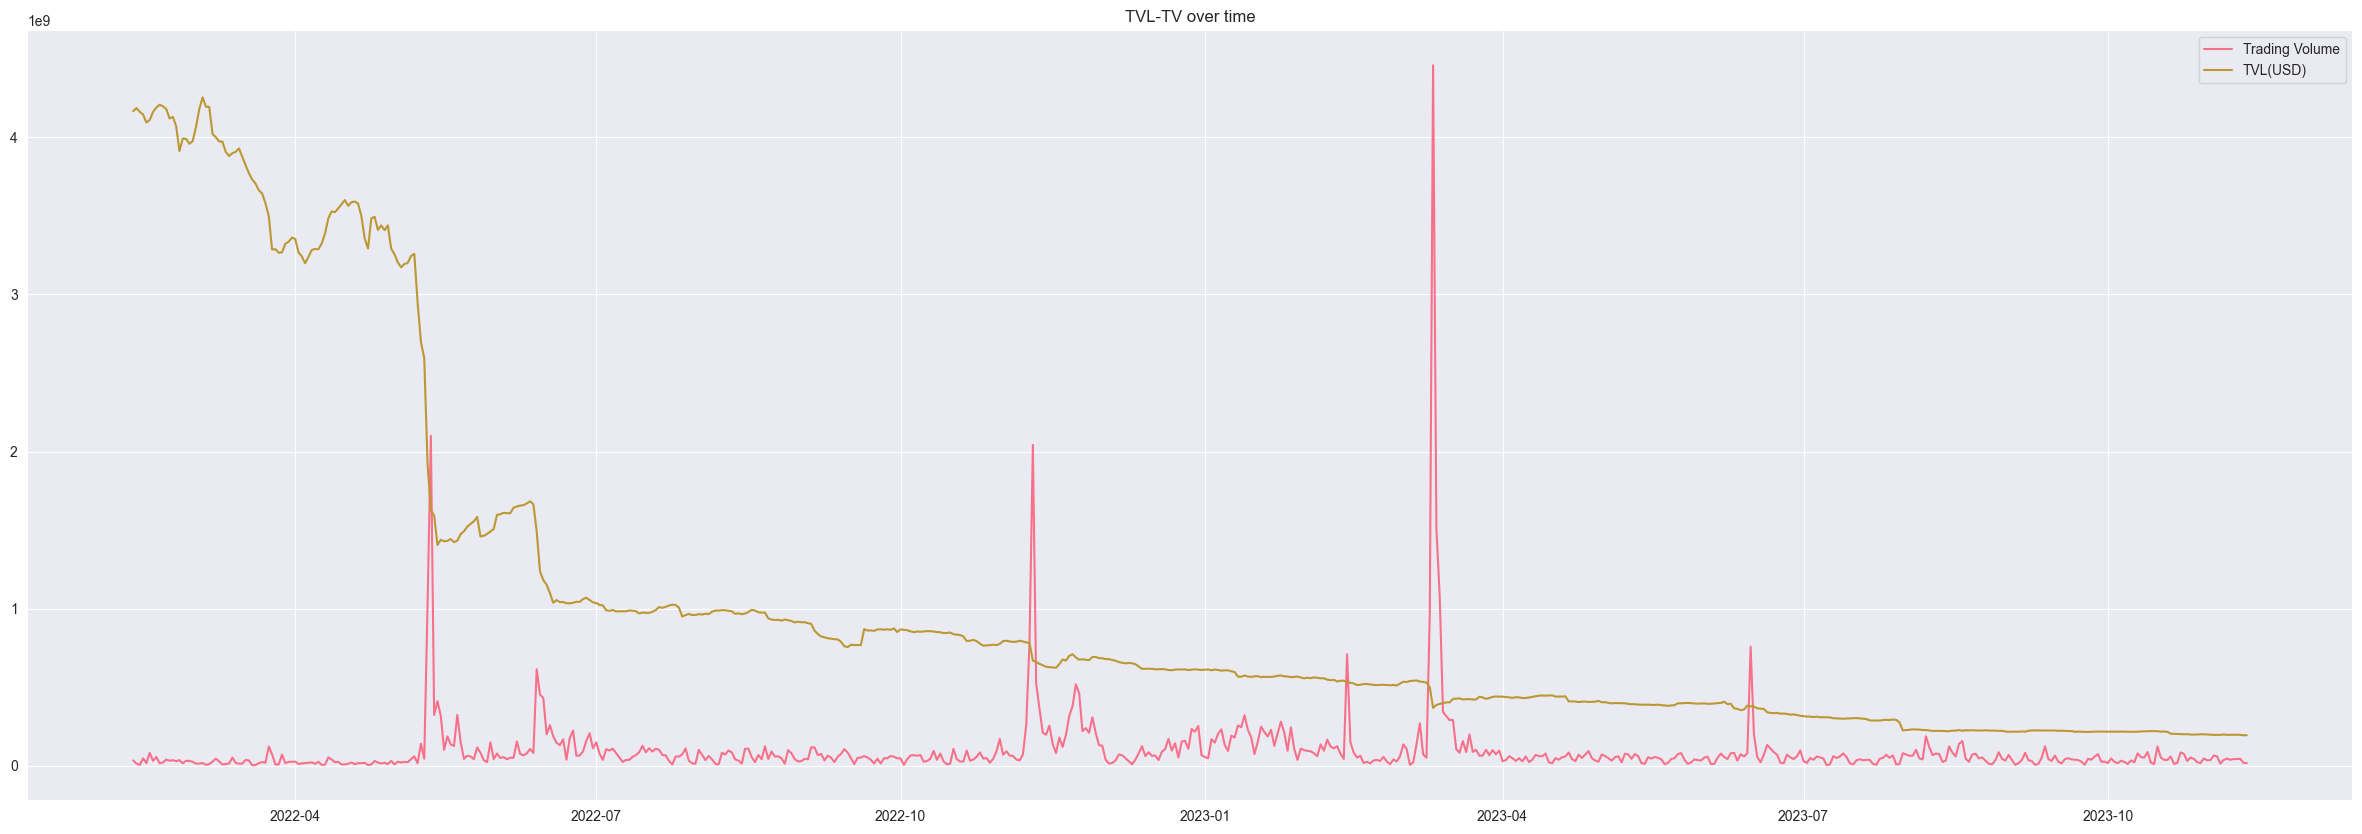

In [47]:
plt.figure(figsize=(30,10))
plt.plot(da_ut_tc['DATE'], da_ut_tc['TOTAL_TRADING_VOLUME_USD'], label='Trading Volume')

plt.plot(da_ut_tc['DATE'], da_ut_tc['TVL'], label='TVL(USD)')

plt.title('TVL-TV over time')

plt.legend()

plt.show()


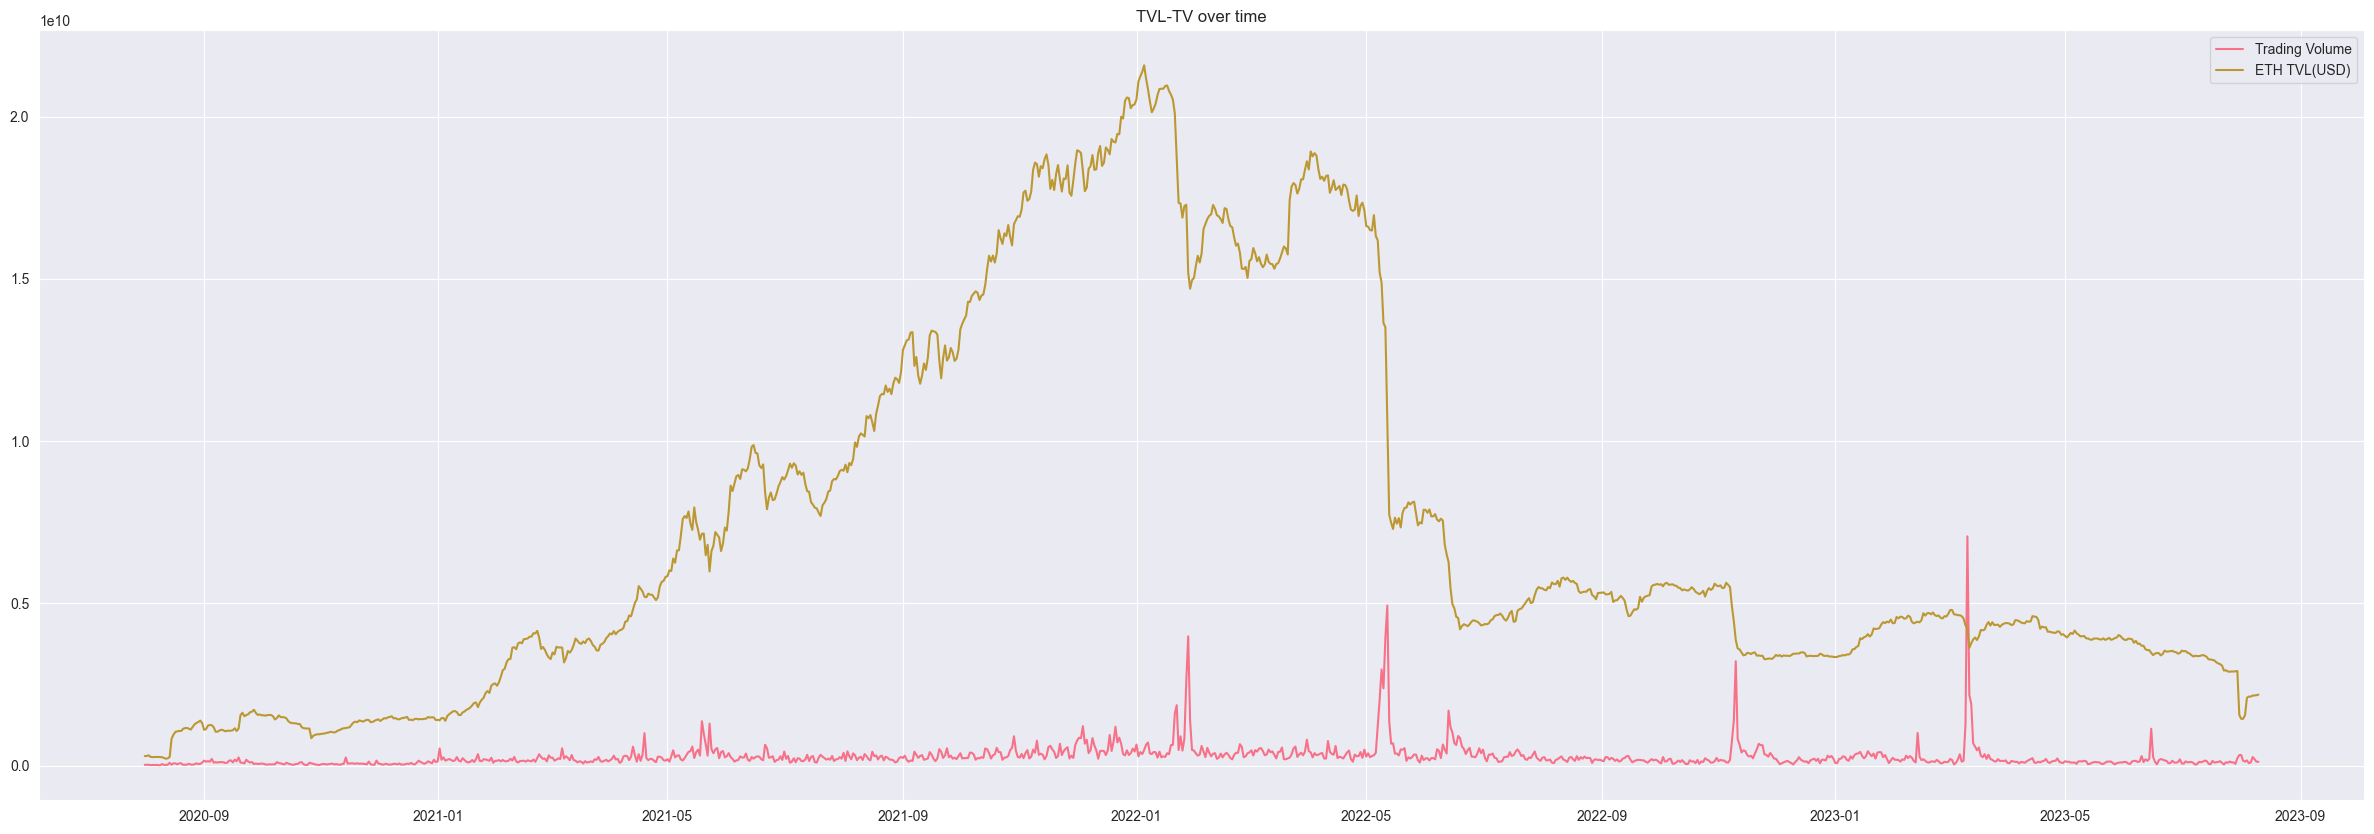

In [48]:
plt.figure(figsize=(30,10))
plt.plot(DEX['Date'], DEX['Trading Volume'], label='Trading Volume')

plt.plot(DEX['Date'], DEX['ETH TVL(USD)'], label='ETH TVL(USD)')

plt.title('TVL-TV over time')

plt.legend()

plt.show()


### **Price Movements** ✅

Token price movements can significantly impact trading volume in various ways. Higher volatility often attracts more traders seeking profit opportunities, potentially leading to increased trading volume. Price changes can create arbitrage opportunities, prompting active trading. Investor sentiment is influenced by bullish or bearish trends, affecting trading activity. Market speculation, news events, and technical analysis signals also contribute to shifts in trading volume as traders react to price movements. Additionally, deeper market depth and higher volatility can impact the ease with which large trades can be executed, influencing overall trading volume dynamics. The relationship between token prices and trading volume is dynamic and context-dependent.

In [49]:
usdc = pd.read_csv('DATA/usdc-usd-max.csv')
usdc.rename(columns={"snapped_at":"DATE"},inplace=True)
usdc['DATE'] = pd.to_datetime(usdc['DATE']).dt.tz_convert(None)
DUU['DATE'] = pd.to_datetime(DUU['DATE'])

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [51]:
PM = pd.merge(DUU,usdc, on='DATE')[['DATE','TOTAL_TRADING_VOLUME_USD','price']]

In [52]:
PM[['TOTAL_TRADING_VOLUME_USD','price']] = scaler.fit_transform(PM[['TOTAL_TRADING_VOLUME_USD','price']])

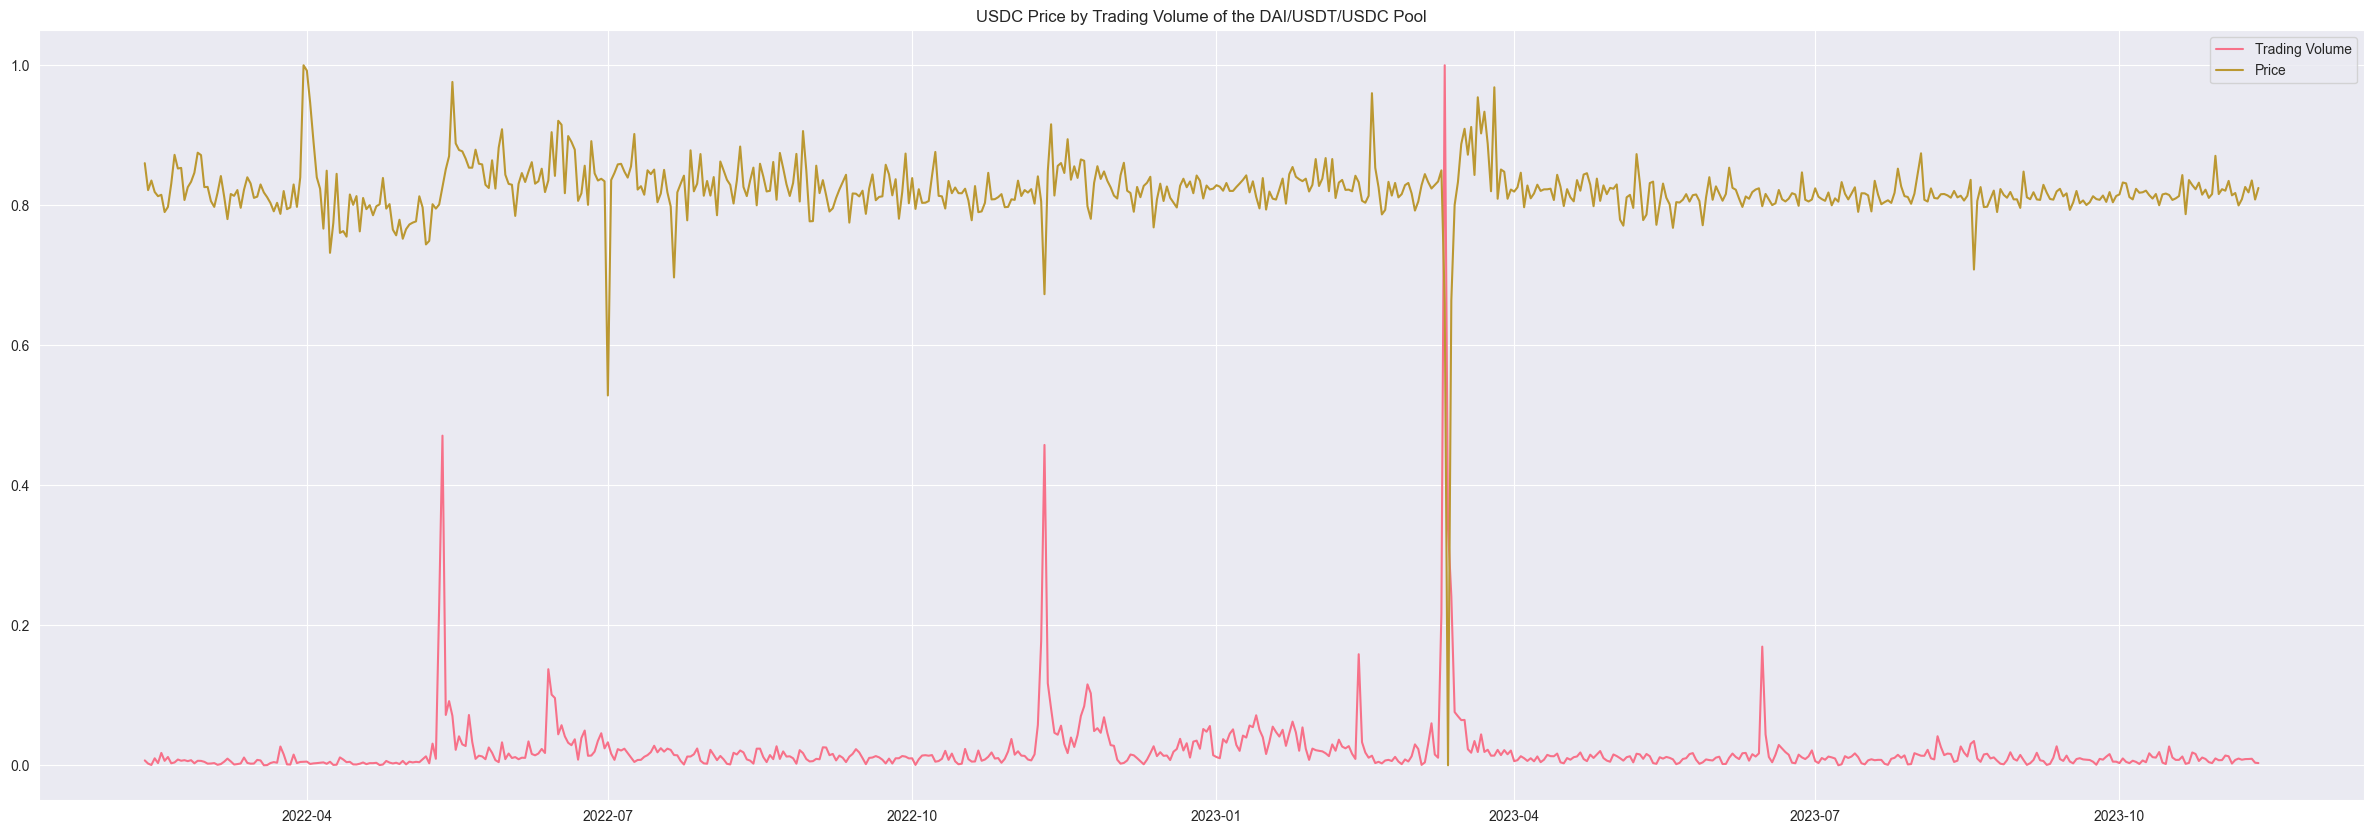

In [53]:
plt.figure(figsize=(30, 10))
plt.plot(PM["DATE"], PM["TOTAL_TRADING_VOLUME_USD"], label="Trading Volume")

plt.plot(PM["DATE"], PM["price"], label="Price")

plt.title("USDC Price by Trading Volume of the DAI/USDT/USDC Pool")
plt.legend()

plt.show()

### **Trading Volume -> TVL** ✅

Upon analysis, it becomes evident that there is a negative correlation between trading volume and liquidity. The charts reveal that an increase in trading volume is associated with a decrease in liquidity. This observed pattern may be attributed to a substantial transfer of funds during periods of heightened trading activity, contributing to a reduction in the available liquidity.

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [55]:
DEX[['Trading Volume','ETH TVL(USD)']] = scaler.fit_transform(DEX[['Trading Volume','ETH TVL(USD)']])

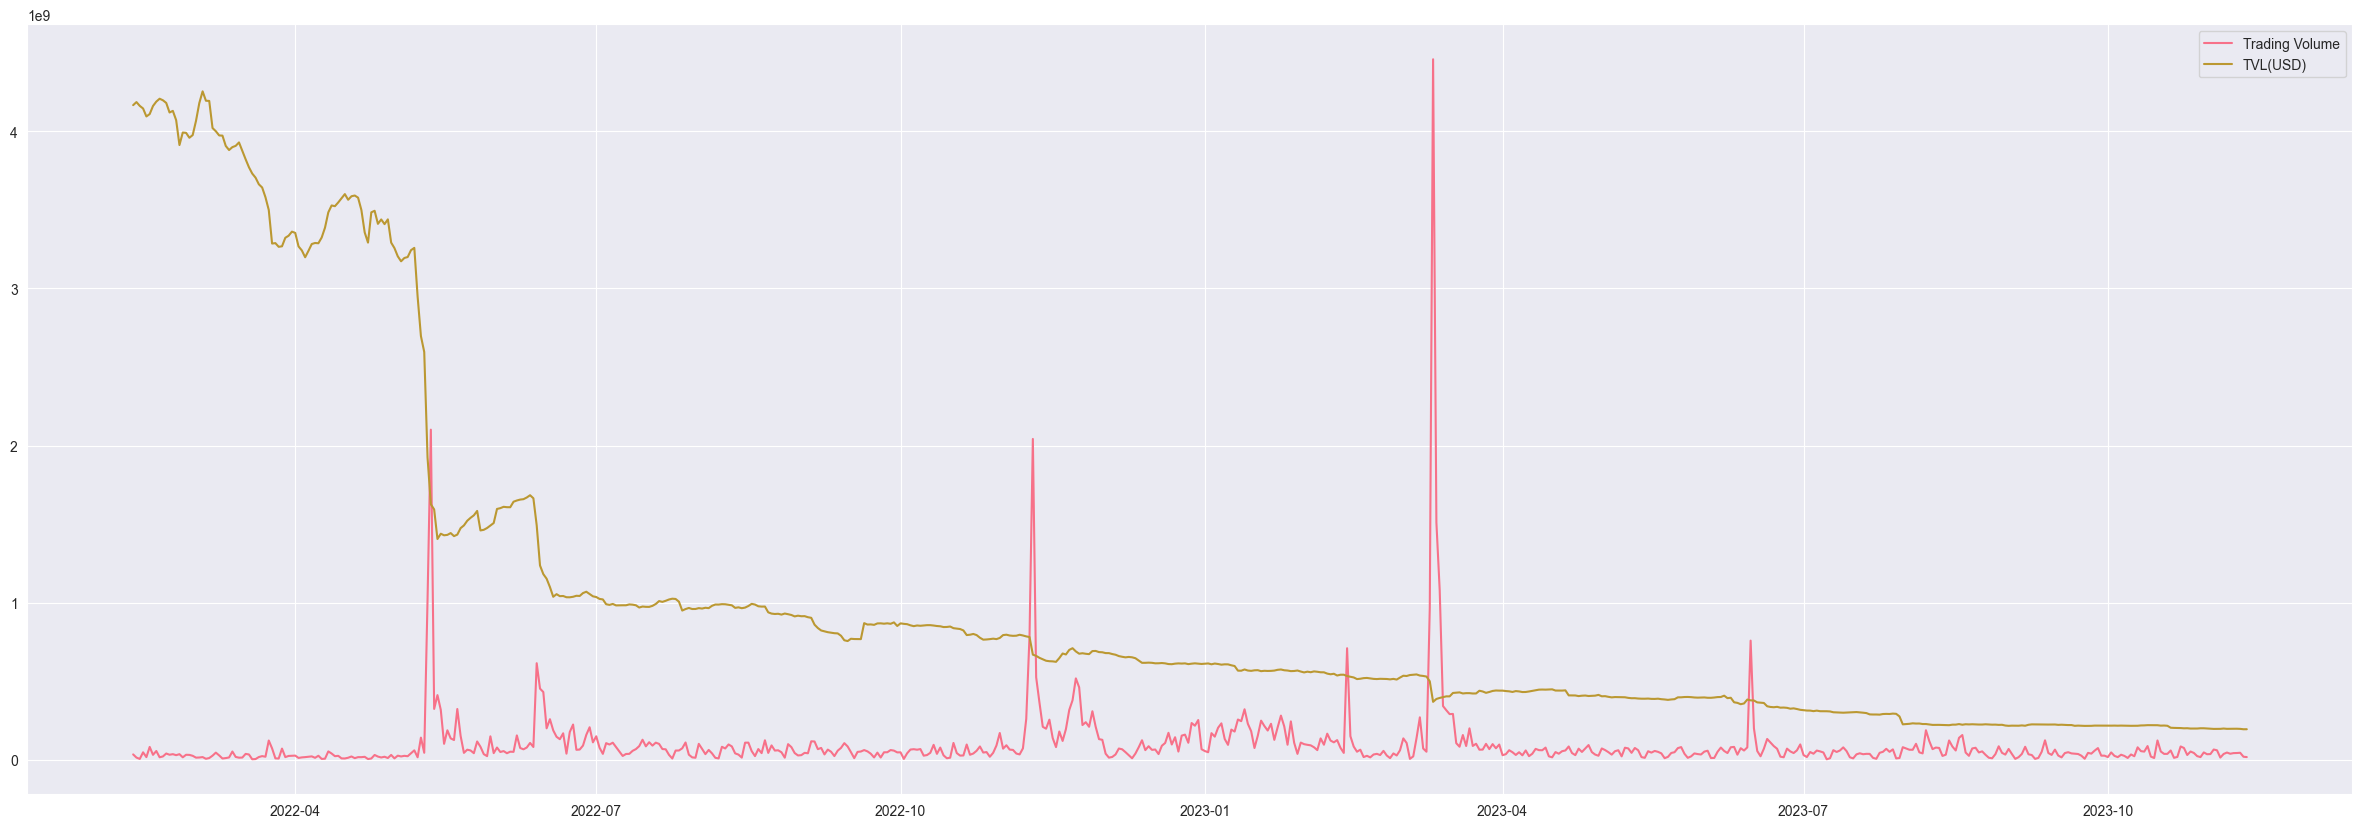

In [56]:
plt.figure(figsize=(30,10))
plt.plot(da_ut_tc['DATE'], da_ut_tc['TOTAL_TRADING_VOLUME_USD'], label='Trading Volume')
plt.plot(da_ut_tc['DATE'], da_ut_tc['TVL'], label='TVL(USD)')
plt.title('')
plt.legend()
plt.show()

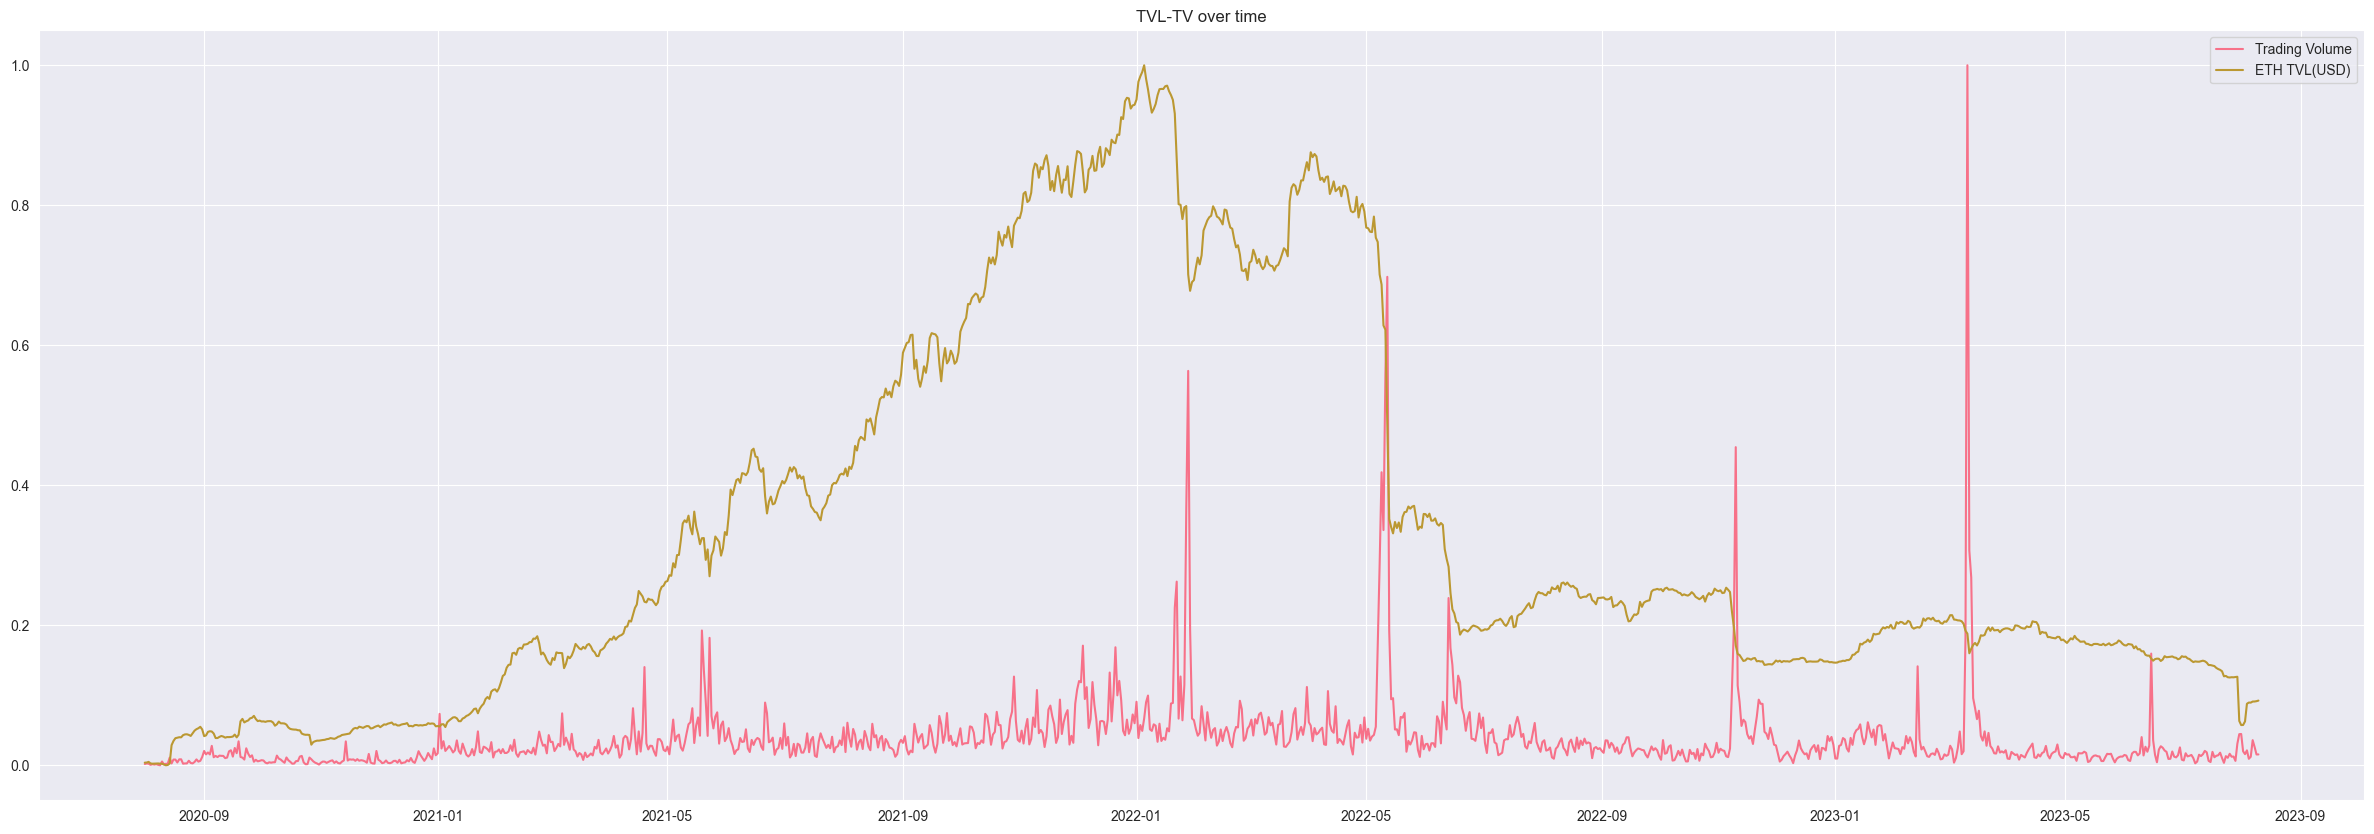

In [57]:
plt.figure(figsize=(30,10))
plt.plot(DEX['Date'], DEX['Trading Volume'], label='Trading Volume')

plt.plot(DEX['Date'], DEX['ETH TVL(USD)'], label='ETH TVL(USD)')

plt.title('TVL-TV over time')

plt.legend()

plt.show()


# **Unusual Activities ✅**
Task : Identify and analyze unusual activities on Curve Finance, such as wash trading, front-running, and pump-and-dump schemes. Determine the root causes of these behaviors and assess their impact on the protocol.

### *Front-End Attack*
- **Date**: Aug. 9, 2022
- **Protocol**: Curve
- **Description**: Curve is a decentralized liquidity protocol for stablecoin trading.
- **Attack**: A hacker changed the domain name system (DNS) entry for the protocol, redirecting users to a fake clone and approving a malicious contract.
- **Impact**: The hacker stole over $570,000 from the users who interacted with the fake frontend.
- **Response**: The protocol advised users to revoke any approvals or swaps they made on curve.fi or curve.exchange in the past few hours, and to use curve.exchange until the issue was resolved. The protocol also said that they found and fixed the source of the hack, and that other pools were safe.
- **Sources**: [1](https://www.coindesk.com/business/2022/08/09/defi-protocol-curvefinance-hacked-570k-stolen/), [2](https://cryptobriefing.com/curve-finance-exploited-in-ongoing-attack/)

### *Reentrancy Vulnerability*
- **Date**: July 30, 2021
- **Protocol**: Curve
- **Description**: Curve is a decentralized liquidity protocol for stablecoin trading.
- **Attack**: Several stable pools on Curve using Vyper were exploited due to a reentrancy vulnerability, which allowed attackers to manipulate the prices of stablecoins and drain funds from the pools. Some of the attacks were front run by MEV bots, which either extracted value from the attackers or acted as white hats and returned funds to the pools.
- **Impact**: The attacker(s) reportedly made over $61 million worth of profit from the attack, while some of the funds were also front-run by other bots or returned by white hats. The affected pools included alETH-ETH, pETH-ETH, sETH-ETH, and BNB-based pools. The Curve DAO token (CRV) also suffered a loss of 32 million tokens from the swap pool.
- **Response**: The Curve team advised users to revoke any approvals or swaps they made on curve.fi or curve.exchange in the past few hours, and to use curve.exchange until the issue was resolved. The team also said that they found and fixed the source of the hack, and that other pools were safe.
- **Sources**: [1](https://www.coindesk.com/business/2023/07/30/curve-finance-exploit-puts-100m-worth-of-crypto-at-risk/), [2](https://tradedog.io/curve-finance-hack-understanding-the-vulnerability-and-recovery-efforts/)


# **Trading Strategy** ✅

- **Maximize CRV rewards**: This strategy involves providing liquidity to the pools that have the highest CRV rewards, which are shown in the second column of the Curve UI. These rewards are based on the gauge weight, which is determined by the CRV holders' votes. The liquidity provider can also boost their CRV rewards by locking some of their CRV tokens in the Curve DAO, which increases their voting power and their share of the rewards. This strategy can be lucrative if the CRV price appreciates over time, or if the liquidity provider sells their CRV tokens at opportune moments. However, this strategy also entails some risks, such as impermanent loss, volatility of CRV price, and high gas fees for depositing, withdrawing, and claiming rewards. To mitigate these risks, the liquidity provider should monitor the pool performance, the CRV price, and the gas fees regularly, and adjust their strategy accordingly. Some of the pools that have high CRV rewards are the **TriCrypto** pool, the **sETH** pool, and the **3pool**.  

- **Minimize impermanent loss**: This strategy involves providing liquidity to the pools that have the lowest risk of impermanent loss, which is the loss of potential profit due to the divergence of the prices of the tokens in the pool. Impermanent loss is more likely to occur in pools that have volatile or correlated tokens, such as the BTC pools or the ETH pools. To avoid impermanent loss, the liquidity provider can choose to provide liquidity to the pools that have stable or pegged tokens, such as the stablecoin pools or the synthetic pools. These pools have low slippage and low volatility, which means the liquidity provider can earn consistent trading fees without losing much value. However, this strategy also has some drawbacks, such as lower CRV rewards, lower trading volume, and lower returns compared to other pools. To optimize this strategy, the liquidity provider should compare the different pools and their parameters, such as the fee factor, the amplification coefficient, and the swap fee. Some of the pools that have low impermanent loss are the **USDN** pool, the **sUSD** pool, and the **EURS** pool.  

- **Leverage composability**: This strategy involves using the liquidity tokens (LP tokens) that the liquidity provider receives from Curve to earn additional rewards elsewhere in the DeFi ecosystem. This is possible because Curve is compatible with many other protocols that offer various incentives and opportunities for liquidity providers. For example, the liquidity provider can stake their LP tokens in other platforms, such as Yearn, Convex, or Badger, to earn more yield and governance tokens. Alternatively, the liquidity provider can use their LP tokens as collateral to borrow or lend on other platforms, such as Aave, Compound, or Maker, to access more capital or leverage. This strategy can be very profitable if the liquidity provider can find the best combination of platforms and pools that suit their risk and return preferences. However, this strategy also involves more complexity and risk, such as smart contract risk, liquidation risk, and opportunity cost. To execute this strategy, the liquidity provider should do thorough research and due diligence on the different platforms and pools, and use tools such as Zapper or DeFi Saver to manage their positions. Some of the platforms that offer composability with Curve are **Yearn**, **Convex**, and **Badger**.

# **BIS Use Cases ✅**

The insights obtained from this challenge can assist the Bank for International Settlements (BIS) in exploring use cases for Curve's AMM (Automated Market Maker) design in the context of Project Mariana, a cross-border CBDC (Central Bank Digital Currency) pilot program. Using the insights obtained, answer the following questions:

1) What specific aspects of Curve's AMM design make it suitable for cross-border CBDC projects like Project Mariana?
2) How can using Curve's AMM technology enhance the efficiency and effectiveness of cross-border CBDC transactions?
3) Why is the collaboration between a central bank institution like BIS and a DeFi platform like Curve significant for the broader financial ecosystem?
4) What are the potential benefits and challenges associated with integrating Curve's AMM design into the CBDC ecosystem, and how can these be addressed?

### **1) What specific aspects of Curve's AMM design make it suitable for cross-border CBDC projects like Project Mariana?**
- **Low Slippage and High Liquidity:** Curve's AMM design, known for maintaining low slippage and high liquidity, is crucial for cross-border CBDC transactions. This ensures that transactions can be executed with minimal price impact, making it ideal for large-scale and frequent cross-border transactions.

- **Stablecoin Expertise:** Curve's specialization in stablecoin trading aligns well with CBDCs, which are designed to maintain a stable value pegged to fiat currencies. The AMM's experience in handling stablecoins can contribute to the stability of cross-border CBDC transactions.

- **Automated Market Making:** The automated nature of Curve's AMM provides a seamless and decentralized platform for cross-border transactions. This automation streamlines the exchange process, reducing the need for intermediaries and enhancing the overall efficiency of transactions.

### **2) How can using Curve's AMM technology enhance the efficiency and effectiveness of cross-border CBDC transactions?**
- **24/7 Availability:** Curve's AMM operates on blockchain technology, allowing for continuous and 24/7 availability. This can significantly enhance the speed and efficiency of cross-border CBDC transactions, enabling transactions to occur at any time, overcoming traditional banking hours and delays.

- **Decentralization and Security:** The decentralized nature of Curve's AMM, operating on blockchain, adds an extra layer of security to cross-border CBDC transactions. It reduces the risk of single points of failure and potential security vulnerabilities associated with centralized systems.

- **Cost-Effective Transactions:** The low fees and efficient market-making strategies of Curve's AMM can contribute to cost-effective cross-border CBDC transactions. This is particularly significant for large-scale transactions, where traditional banking fees can be substantial.

### **3) Why is the collaboration between a central bank institution like BIS and a DeFi platform like Curve significant for the broader financial ecosystem?**
- **Innovation and Synergy:** The collaboration signifies a synergy between traditional central banking institutions and innovative decentralized finance platforms. It brings together the stability and authority of central banks with the innovation and efficiency of DeFi, fostering an environment for technological advancements and financial innovation.

- **Global Financial Inclusion:** The collaboration has the potential to bridge the gap between traditional financial systems and the emerging decentralized financial landscape. This can contribute to global financial inclusion by leveraging the strengths of both worlds to create more accessible and efficient financial services.

- **Knowledge Exchange:** The partnership facilitates a two-way knowledge exchange. Traditional institutions can benefit from the technological expertise of DeFi platforms, while DeFi platforms can gain insights into regulatory frameworks and financial stability measures, fostering a more informed and balanced financial ecosystem.

### **4) What are the potential benefits and challenges associated with integrating Curve's AMM design into the CBDC ecosystem, and how can these be addressed?**
- **Benefits:**
  - **Efficiency:** Integration can enhance transaction efficiency and reduce costs, as Curve's AMM offers low fees, low slippage, and high liquidity for stablecoin trading.
  - **Innovation:** Integration can foster innovation and new use cases, as Curve's AMM enables cross-chain swaps, synthetic asset creation, and yield farming for CBDCs.
  - **Inclusion:** Integration can promote financial inclusion and accessibility, as Curve's AMM operates on blockchain technology, allowing for 24/7 availability and decentralization of cross-border CBDC transactions.

- **Challenges:**
  - **Regulation:** Integration can pose regulatory challenges and compliance issues, as different jurisdictions may have different rules and standards for CBDCs and DeFi platforms.
  - **Security:** Integration can raise security concerns, as decentralized platforms may be vulnerable to hacking, fraud, or malicious actors.
  - **Trust:** Integration can create trust issues, as users may be unfamiliar or skeptical about the reliability and integrity of decentralized platforms.
  - **Education:** Integration can require education, as users may need to learn how to use and benefit from the new ecosystem, and how to manage the risks and challenges involved.

- **Solutions:**
  - **Regulation:** The CBDC ecosystem can collaborate with regulators and policymakers to establish clear and consistent guidelines and standards for DeFi integration, and ensure transparency and accountability of the participants.
  - **Security:** The CBDC ecosystem can adopt security and audit measures to ensure the reliability and integrity of the DeFi platforms, and implement robust protocols to address any security incidents or breaches.
  - **Trust:** The CBDC ecosystem can foster trust and confidence among the users and stakeholders by demonstrating the advantages and opportunities of DeFi integration, and by providing support and assistance to the users.
  - **Education:** The CBDC ecosystem can implement educational initiatives and campaigns to familiarize the users with the new ecosystem, and to provide them with the necessary skills and knowledge to use and benefit from the DeFi platforms.